In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df=pd.read_csv('Algerian_forest_fires_cleaned_datasett.csv')

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [6]:
#drop month day and year
df.drop(['month','day','year'],axis=1)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [7]:
df['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [8]:
#encoding
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [9]:
df['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [10]:
#independent and dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [11]:
X.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [12]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [13]:
##feature selection based on correlation
df.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.202840,0.000821
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.024004,0.001857
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734


<Axes: >

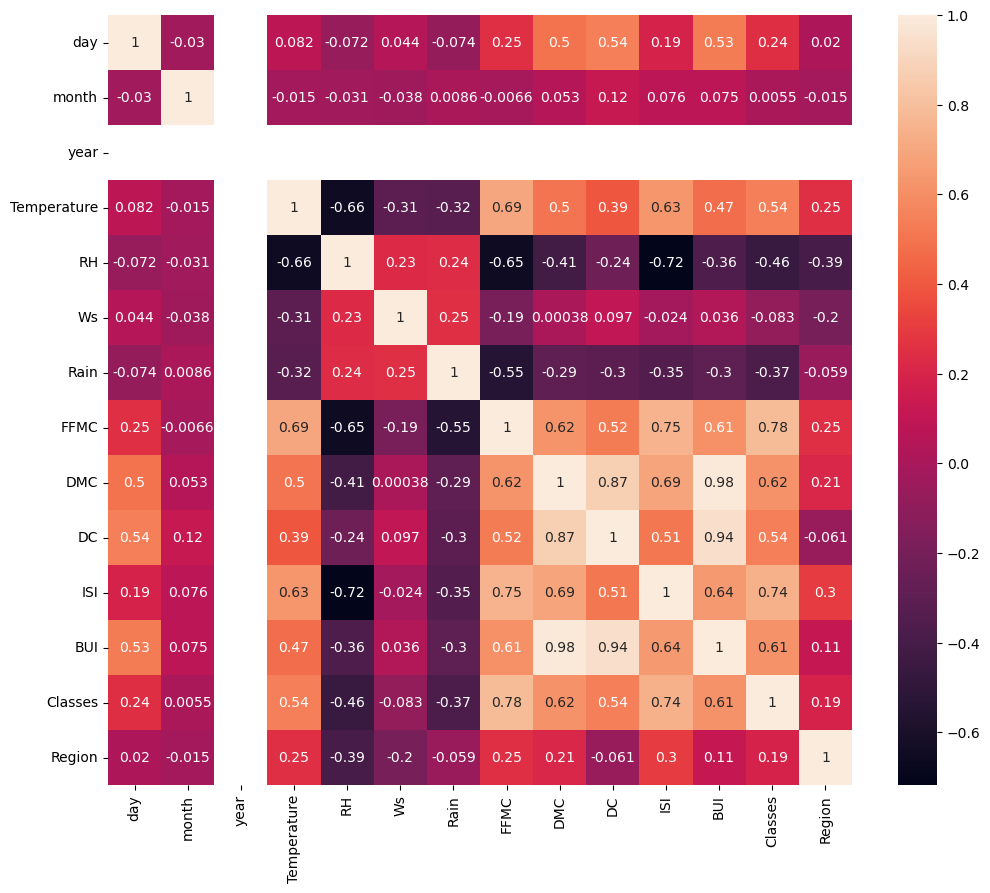

In [14]:
## check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)


In [15]:
def correlation(dataset,threshold):
    col_corr=set() #is initialized as an empty set. This set will be used to store the names of columns that meet the correlation threshold.
    corr_matrix=dataset.corr() #corr_matrix is a DataFrame containing the correlation coefficients between all pairs of columns in the dataset
    for i in range(len(corr_matrix.columns)):#iter row
        for j in range(i):#iter column
            if abs(corr_matrix.iloc[i,j])> threshold:
                colname=corr_matrix.columns[i]#take that col
                col_corr.add(colname)#add it 
                
    return col_corr

In [16]:
## threshold set by domain expertise
corr_features=correlation(X_train,0.85)

In [17]:
## drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 12), (61, 12))

#  feature scaling or standardization



In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [19]:
X_train_scaled

array([[-1.10036414,  1.3585682 ,  0.        , ..., -0.62963326,
        -1.10431526, -0.98907071],
       [ 0.47831144, -1.34865164,  0.        , ..., -0.93058524,
        -1.10431526,  1.01105006],
       [-0.53655144,  0.45616158,  0.        , ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.66417685,  1.3585682 ,  0.        , ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 1.49317432, -0.44624503,  0.        , ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.53655144,  1.3585682 ,  0.        , ..., -0.86113478,
        -1.10431526, -0.98907071]])

# Box plots to understand effect of standard scaler

C:\Users\riyem\AppData\Local\Temp\ipykernel_31600\1216587142.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'X_train after Scaling')

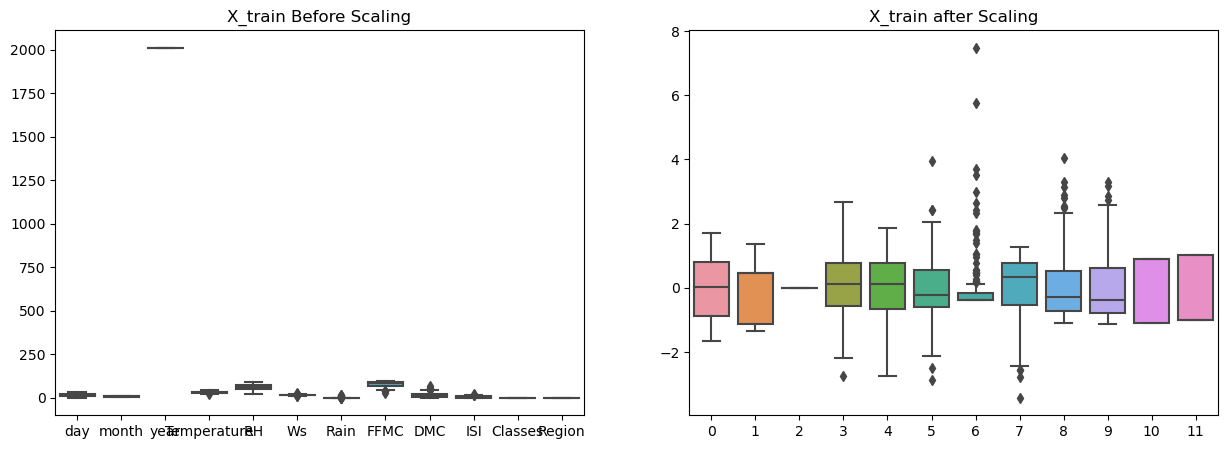

In [29]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train after Scaling')

# Linear Regression Model

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score",score)



Mean absolute error 0.5796315075744043
R2 Score 0.9837888473078156


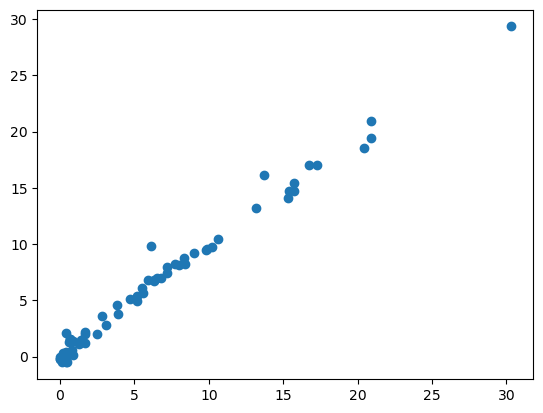

In [22]:
plt.scatter(y_test,y_pred)

Mean absolute error 1.1331759902742846
R2 Score 0.9492020277152009


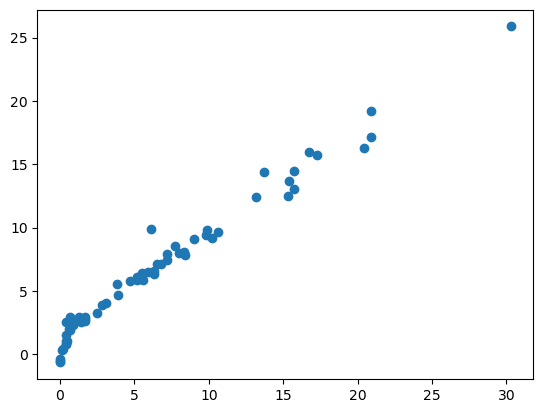

In [23]:
##Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

# Cross Validation Lasso

In [33]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5) 
lassocv.fit(X_train_scaled,y_train)##will play with alpha values de facon que cost function is reduced but never reaches zero

LassoCV(cv=5)

In [34]:
lassocv.predict(X_test_scaled)

array([ 8.21451569,  7.51019805, -0.42412229,  4.83572574,  7.01313731,
        1.87782318,  2.21386017,  7.72164775,  1.82946499,  3.57467932,
        0.618776  ,  9.99806001,  9.45240668, 16.9325602 , 18.29819647,
        1.54339663,  1.82900214, -0.67451479,  7.18733341,  2.92960552,
        1.81019838,  0.19406234,  6.63596403, -0.0368135 , 20.88644592,
        5.07907003,  5.71182742,  9.7212584 , -0.81188189,  9.76543734,
        6.8666815 , -0.32077674, 10.34668318, 14.50563729,  1.71051315,
        0.64695968,  2.03037538,  5.98059647, -0.65878561, -0.24988293,
        6.47121483,  2.34018086,  8.61024228, -0.86191309, 15.40542735,
        8.23054356,  8.44201964,  1.33410145, 13.16234851,  1.44086746,
       29.00634052,  5.3652556 , 17.04640842, 19.27742469, 13.82993437,
       16.00897825,  0.93490814,  9.23946017,  3.9266112 , 14.51940953,
        5.06938634])

Mean absolute error 0.5991395275398745
R2 Score 0.9831604230861805


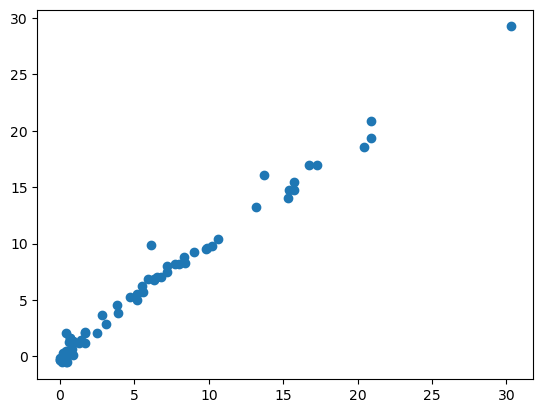

In [24]:
## Ridge Regression model

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)


In [35]:
lassocv.alpha_

0.05725391318234408

In [38]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

# Elasticnet Regression

Mean absolute error 1.8558782857277105
R2 Score 0.8760305780807829


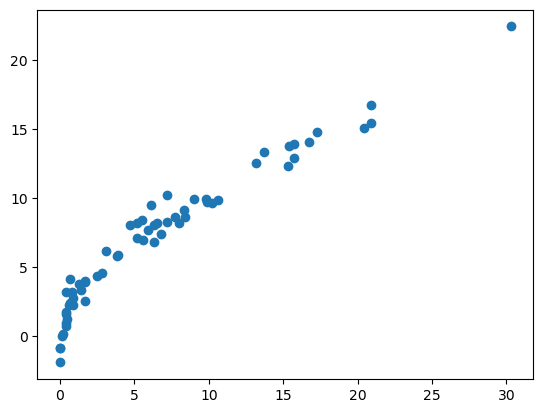

In [31]:
## Ridge Regression model

from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)